In [292]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, cross_validation
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns


pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [180]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro


In [181]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [182]:
df['gpm'] = 1/df.mpg

In [183]:
df.gpm

0      0.055556
1      0.066667
2      0.055556
3      0.062500
4      0.058824
5      0.066667
6      0.071429
         ...   
391    0.027778
392    0.037037
393    0.037037
394    0.022727
395    0.031250
396    0.035714
397    0.032258
Name: gpm, dtype: float64

In [184]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,gpm
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,-0.935364
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,0.839278
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,0.866631
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.854809
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,0.885219
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,-0.455750
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,-0.557427
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,-0.530213
gpm,-0.935364,0.839278,0.866631,0.854809,0.885219,-0.455750,-0.557427,-0.530213,1.000000


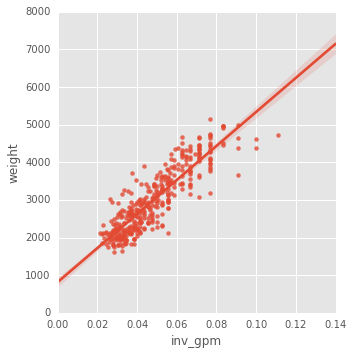

In [187]:
sns.lmplot('inv_gpm', 'weight', df)

In [188]:
df[ ['mpg_log', 'weight_log'] ] = df[ ['mpg', 'weight'] ].apply(np.log)

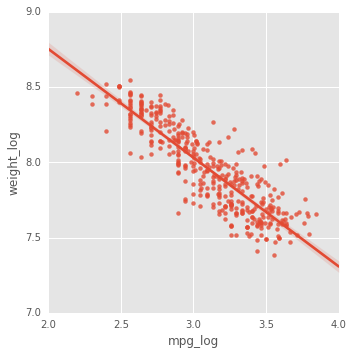

In [189]:
sns.lmplot('mpg_log', 'weight_log', df)

In [190]:
df['inv_gpm'] = 1./df.mpg

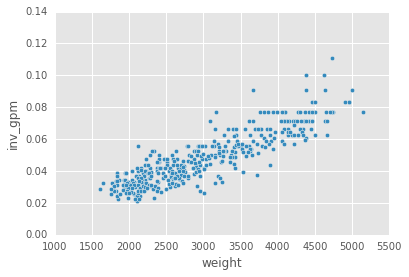

In [191]:
df.plot.scatter(x = 'weight', y = 'inv_gpm')

In [193]:
mpg_cylinders = smf.ols(formula = 'mpg ~ cylinders', data = df).fit()
mpg_cylinders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           4.50e-81
Time:                        20:17:24   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     42.9493      0.833     51.557      0.000        41.312    44.587
cylinders     -3.5629      0.146    -24.435      0.000        -3.850    -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
mpg_displacement = smf.ols(formula = 'mpg ~ displacement', data = df).fit()
mpg_displacement.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           1.66e-91
Time:                        20:17:24   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000        34.208    36.142
displacement    -0.0603      0.002    -26.926      0.000        -0.065    -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
mpg_horsepower = smf.ols(formula = 'mpg ~ horsepower', data = df).fit()
mpg_horsepower.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           7.03e-81
Time:                        20:17:24   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
mpg_weight = smf.ols(formula = 'mpg ~ weight', data = df).fit()
mpg_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          2.97e-103
Time:                        20:17:24   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000        44.754    47.881
weight        -0.0077      0.000    -29.814      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
mpg_acc = smf.ols(formula = 'mpg ~ acceleration', data=df).fit()
mpg_acc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           1.82e-18
Time:                        20:17:24   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.9698      2.043      2.432      0.015         0.953     8.987
acceleration     1.1912      0.129      9.217      0.000         0.937     1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
mpg_mod = smf.ols(formula='mpg ~ model_year', data=df).fit()
mpg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           4.84e-37
Time:                        20:17:24   Log-Likelihood:                -1301.2
No. Observations:                 398   AIC:                             2606.
Df Residuals:                     396   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -69.5556      6.589    -10.556      0.000       -82.510   -56.602
model_year     1.2244      0.087     14.141      0.000         1.054     1.395
==============================================================================
Omnibus:                       22.686   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.247
Skew:                           0.383   Prob(JB):                     0.000297
Kurtosis:                       2.373   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
#mpg_origin = smf.ols(formula = 'mpg ~ origin', data=df).fit()
#mpg_origin.summary()
#nothing can be done on origin -- remove this column

In [200]:
#mpg_car = smf.ols(formula = 'mpg ~ car_name', data=df).fit()
#mpg_car.summary()

In [201]:
df = df.drop('origin', 1)

In [202]:
df = df.drop('cylinders', 1)

In [203]:
df

,mpg,displacement,horsepower,weight,acceleration,...,car_name,gpm,inv_gpm,mpg_log,weight_log
0,18.0,307.0,130.0,3504.0,12.0,...,chevrolet chevelle malibu,0.055556,0.055556,2.890372,8.161660
1,15.0,350.0,165.0,3693.0,11.5,...,buick skylark 320,0.066667,0.066667,2.708050,8.214194
2,18.0,318.0,150.0,3436.0,11.0,...,plymouth satellite,0.055556,0.055556,2.890372,8.142063
3,16.0,304.0,150.0,3433.0,12.0,...,amc rebel sst,0.062500,0.062500,2.772589,8.141190
4,17.0,302.0,140.0,3449.0,10.5,...,ford torino,0.058824,0.058824,2.833213,8.145840
5,15.0,429.0,198.0,4341.0,10.0,...,ford galaxie 500,0.066667,0.066667,2.708050,8.375860
6,14.0,454.0,220.0,4354.0,9.0,...,chevrolet impala,0.071429,0.071429,2.639057,8.378850
...,...,...,...,...,...,...,...,...,...,...,...
391,36.0,135.0,84.0,2370.0,13.0,...,dodge charger 2.2,0.027778,0.027778,3.583519,7.770645
392,27.0,151.0,90.0,2950.0,17.3,...,chevrolet camaro,0.037037,0.037037,3.295837,7.989560


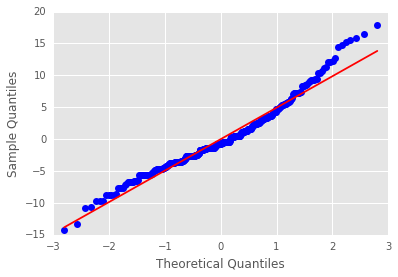

In [204]:
figure = sm.qqplot(mpg_cylinders.resid, line = 's')

In [206]:
#sorted(df.cylinders.unique())

In [ ]:
#df.boxplot('gpm','cylinders')

In [ ]:
#df.boxplot('mpg','cylinders')

In [214]:
df.corr()

,mpg,displacement,horsepower,weight,acceleration,model_year,gpm,inv_gpm,mpg_log,weight_log
mpg,1.000000,-0.804203,-0.778427,-0.831741,0.420289,0.579267,-0.935364,-0.935364,0.983776,-0.843979
displacement,-0.804203,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.866631,0.866631,-0.853619,0.918805
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.854809,0.854809,-0.830155,0.845609
weight,-0.831741,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.885219,0.885219,-0.875567,0.991420
acceleration,0.420289,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.455750,-0.455750,0.445809,-0.401921
model_year,0.579267,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.557427,-0.557427,0.576342,-0.284009
gpm,-0.935364,0.866631,0.854809,0.885219,-0.455750,-0.557427,1.000000,1.000000,-0.982971,0.869729
inv_gpm,-0.935364,0.866631,0.854809,0.885219,-0.455750,-0.557427,1.000000,1.000000,-0.982971,0.869729
mpg_log,0.983776,-0.853619,-0.830155,-0.875567,0.445809,0.576342,-0.982971,-0.982971,1.000000,-0.874469
weight_log,-0.843979,0.918805,0.845609,0.991420,-0.401921,-0.284009,0.869729,0.869729,-0.874469,1.000000


In [215]:
df.corr().gpm.sort_values()

mpg_log        -0.982971
mpg            -0.935364
model_year     -0.557427
acceleration   -0.455750
horsepower      0.854809
displacement    0.866631
weight_log      0.869729
weight          0.885219
gpm             1.000000
inv_gpm         1.000000
Name: gpm, dtype: float64

In [207]:
gpm_weight = smf.ols(formula = 'gpm ~ weight', data = df).fit()
gpm_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1434.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.08e-133
Time:                        20:17:47   Log-Likelihood:                 1371.8
No. Observations:                 398   AIC:                            -2740.
Df Residuals:                     396   BIC:                            -2732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0038      0.001     -2.715      0.007        -0.007    -0.001
weight      1.734e-05   4.58e-07     37.869      0.000      1.64e-05  1.82e-05
==============================================================================
Omnibus:                       38.100   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.018
Skew:                           0.520   Prob(JB):                     1.55e-18
Kurtosis:                       4.966   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
df.mpg.median()

23.0

In [216]:
gpm_disp = smf.ols(formula = 'gpm ~ displacement', data = df).fit()
gpm_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.24e-121
Time:                        20:23:31   Log-Likelihood:                 1343.9
No. Observations:                 398   AIC:                            -2684.
Df Residuals:                     396   BIC:                            -2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0210      0.001     23.965      0.000         0.019     0.023
displacement     0.0001   3.99e-06     34.564      0.000         0.000     0.000
==============================================================================
Omnibus:                       81.498   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.011
Skew:                           0.801   Prob(JB):                     5.48e-80
Kurtosis:                       7.410   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
gpm_hp = smf.ols(formula = 'gpm ~ horsepower', data = df).fit()
gpm_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1058.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.72e-113
Time:                        20:25:48   Log-Likelihood:                 1307.0
No. Observations:                 392   AIC:                            -2610.
Df Residuals:                     390   BIC:                            -2602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0092      0.001      7.290      0.000         0.007     0.012
horsepower     0.0004   1.14e-05     32.530      0.000         0.000     0.000
==============================================================================
Omnibus:                       15.796   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.034
Skew:                           0.300   Prob(JB):                     6.04e-06
Kurtosis:                       4.055   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
df[ ['hp_sqrt', 'weight_sqrt','disp_sqrt'] ] = df[ ['horsepower', 'weight','displacement'] ].apply(np.sqrt)

In [223]:
df.corr().gpm.sort_values()

mpg_log        -0.982971
mpg            -0.935364
model_year     -0.557427
acceleration   -0.455750
horsepower      0.854809
hp_sqrt         0.859499
disp_sqrt       0.866133
displacement    0.866631
weight_log      0.869729
weight_sqrt     0.879419
weight          0.885219
gpm             1.000000
inv_gpm         1.000000
Name: gpm, dtype: float64

In [226]:
df.horsepower.isnull().count()

398

In [264]:
df.dropna(axis = 'index', subset = ['horsepower'], inplace = True)

In [265]:
df.horsepower.isnull().sum()

0

In [252]:
lamda(x: max(df.model_year)

82

In [266]:
gpm_disp = smf.ols(formula = 'gpm ~ 0 + horsepower + weight', data = df).fit()
gpm_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     9543.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):               0.00
Time:                        21:01:25   Log-Likelihood:                 1379.7
No. Observations:                 392   AIC:                            -2755.
Df Residuals:                     390   BIC:                            -2748.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
horsepower     0.0002   1.85e-05      8.541      0.000         0.000     0.000
weight      1.056e-05   6.65e-07     15.879      0.000      9.26e-06  1.19e-05
==============================================================================
Omnibus:                       25.536   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.734
Skew:                           0.458   Prob(JB):                     2.35e-09
Kurtosis:                       4.263   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))
df['gpm'] = 1. / df.mpg
df['horsepower_sqrt'] = np.sqrt(df.horsepower) 
df = df.dropna(axis = 0, subset = ['gpm', 'displacement', 'horsepower_sqrt', 'weight'])
train_df = df.sample(frac = .6, random_state = 1)
test_df = df.drop(train_df.index)

In [299]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
#print model.score(train_X, train_y)
print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.787735316391


In [297]:
train_X = train_df[ ['horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
#print model.score(train_X, train_y)
print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.789219068589
